# 1. Importing the required libraries, loading the data, and taking a first look

In [3]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import json

In [4]:
all_files = glob.glob('data/raw/*.csv')

In [5]:
df_list = []
for file in all_files:
    df = pd.read_csv(file)
    df_list.append(df)   

trips = pd.concat(df_list, ignore_index=True)

In [6]:
trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,7569BC890583FCD7,classic_bike,2025-01-21 17:23:54.538,2025-01-21 17:37:52.015,Wacker Dr & Washington St,KA1503000072,McClurg Ct & Ohio St,TA1306000029,41.883143,-87.637242,41.892592,-87.617289,member
1,013609308856B7FC,electric_bike,2025-01-11 15:44:06.795,2025-01-11 15:49:11.139,Halsted St & Wrightwood Ave,TA1309000061,Racine Ave & Belmont Ave,TA1308000019,41.929147,-87.649153,41.939743,-87.658865,member
2,EACACD3CE0607C0D,classic_bike,2025-01-02 15:16:27.730,2025-01-02 15:28:03.230,Southport Ave & Waveland Ave,13235,Broadway & Cornelia Ave,13278,41.948226,-87.664071,41.945529,-87.646439,member
3,EAA2485BA64710D3,classic_bike,2025-01-23 08:49:05.814,2025-01-23 08:52:40.047,Southport Ave & Waveland Ave,13235,Southport Ave & Roscoe St,13071,41.948226,-87.664071,41.943739,-87.664020,member
4,7F8BE2471C7F746B,electric_bike,2025-01-16 08:38:32.338,2025-01-16 08:41:06.767,Southport Ave & Waveland Ave,13235,Southport Ave & Roscoe St,13071,41.948226,-87.664071,41.943739,-87.664020,member


In [7]:
trips.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [8]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8765425 entries, 0 to 8765424
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 869.4+ MB


In [9]:
null_counts = trips.isnull().sum()
print(null_counts)

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name    1677057
start_station_id      1677057
end_station_name      1733308
end_station_id        1733308
start_lat                   0
start_lng                   0
end_lat                 10390
end_lng                 10390
member_casual               0
dtype: int64


# 2. Converting to desired data types and sorting

In [10]:
trips = trips.convert_dtypes()

trips['started_at'] = pd.to_datetime(trips['started_at'], format='ISO8601')
trips['ended_at'] = pd.to_datetime(trips['ended_at'], format='ISO8601')

#trips['start_station_name'] = trips['start_station_name'].astype(str) and such was not working

In [11]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8765425 entries, 0 to 8765424
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             string        
 1   rideable_type       string        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  string        
 5   start_station_id    string        
 6   end_station_name    string        
 7   end_station_id      string        
 8   start_lat           Float64       
 9   start_lng           Float64       
 10  end_lat             Float64       
 11  end_lng             Float64       
 12  member_casual       string        
dtypes: Float64(4), datetime64[ns](2), string(7)
memory usage: 902.8 MB


In [12]:
trips_sorted = trips.sort_values(by=['started_at', 'ended_at'])
trips_sorted = trips_sorted.reset_index(drop=True)
trips_sorted.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6A9D809ABDF70617,electric_bike,2024-01-01 00:00:39,2024-01-01 00:07:56,<NA>,<NA>,Clark St & Wrightwood Ave,TA1305000014,41.95,-87.65,41.929546,-87.643118,member
1,26B9F6E416A68EBA,electric_bike,2024-01-01 00:00:50,2024-01-01 00:04:20,<NA>,<NA>,<NA>,<NA>,41.9,-87.62,41.9,-87.62,casual
2,30EF016A0DF5ECEE,electric_bike,2024-01-01 00:00:52,2024-01-01 00:04:25,<NA>,<NA>,<NA>,<NA>,41.9,-87.62,41.9,-87.62,casual
3,0D9E85F804C85828,electric_bike,2024-01-01 00:00:53,2024-01-01 00:22:30,Clinton St & Madison St,TA1305000032,<NA>,<NA>,41.881909,-87.641296,41.89,-87.62,member
4,56F5C3ED5178C131,classic_bike,2024-01-01 00:01:01,2024-01-01 00:24:12,LaSalle St & Illinois St,13430,Indiana Ave & Roosevelt Rd,SL-005,41.890762,-87.631697,41.867888,-87.623041,member
5,A2DA242FA988F2C6,electric_bike,2024-01-01 00:01:30,2024-01-01 00:25:49,<NA>,<NA>,<NA>,<NA>,41.87,-87.62,41.9,-87.64,member
6,70BDF49A30C8BFFC,classic_bike,2024-01-01 00:02:15,2024-01-01 00:07:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.92533,-87.6658,casual
7,BE6196C09FA4685D,electric_bike,2024-01-01 00:06:46,2024-01-01 00:12:26,Winthrop Ave & Lawrence Ave,TA1308000021,<NA>,<NA>,41.968842,-87.657514,41.97,-87.67,casual
8,B7F1F63BD1AFF4E9,classic_bike,2024-01-01 00:06:59,2024-01-01 00:17:21,Western Ave & Howard St,527,Clark St & Lunt Ave,KA1504000162,42.018901,-87.690048,42.009011,-87.674112,member
9,444DD0D82A50BA8C,classic_bike,2024-01-01 00:07:45,2024-01-01 00:15:41,DuSable Lake Shore Dr & North Blvd,LF-005,Sedgwick St & Webster Ave,13191,41.911722,-87.626804,41.922167,-87.638888,casual


# 3. Cleaning up this data...

First of all, ride_id should be a unique identifier

In [13]:
len(trips_sorted['ride_id'].unique())

8765214

In [14]:
duplicates_in_id = trips_sorted[trips_sorted['ride_id'].duplicated()]
duplicates_in_id

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
1669283,D739DA08680E8A0B,classic_bike,2024-05-31 01:02:49.582,2024-06-01 02:02:43.407,Columbus Dr & Randolph St,13263,<NA>,<NA>,41.884728,-87.619521,<NA>,<NA>,casual
1669303,2C2CD7C3DCBC3C39,classic_bike,2024-05-31 01:09:43.561,2024-06-01 02:09:36.476,Michigan Ave & 8th St,623,<NA>,<NA>,41.872773,-87.623981,<NA>,<NA>,casual
1669953,73894F50512DDA03,classic_bike,2024-05-31 06:32:22.834,2024-06-01 07:32:01.767,Broadway & Waveland Ave,13325,<NA>,<NA>,41.949074,-87.648636,<NA>,<NA>,casual
1670468,91D1E6CF6EEA5BD8,classic_bike,2024-05-31 07:16:24.189,2024-06-01 08:16:16.121,California Ave & 21st St,13096,<NA>,<NA>,41.853796,-87.695823,<NA>,<NA>,casual
1672640,DBAEDF6D73232242,classic_bike,2024-05-31 09:27:11.855,2024-06-01 10:26:48.871,Wells St & Huron St,TA1306000012,<NA>,<NA>,41.894722,-87.634362,<NA>,<NA>,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694444,404A6359522B7323,electric_bike,2024-05-31 23:58:52.782,2024-06-01 00:19:50.654,<NA>,<NA>,Morgan St & Polk St,TA1307000130,41.88,-87.64,41.871737,-87.65103,member
1694446,7A3224608C3E5179,electric_bike,2024-05-31 23:59:37.406,2024-06-01 00:06:39.076,Dayton St & North Ave,13058,Sheffield Ave & Wrightwood Ave,TA1309000023,41.910589,-87.649394,41.928712,-87.653833,casual
1694448,710616EF83DFB247,electric_bike,2024-05-31 23:59:47.253,2024-06-01 00:20:16.597,Seeley Ave & Roscoe St,13144,Green St & Madison St,TA1307000120,41.943434,-87.679647,41.881859,-87.649264,member
1694450,A4BCF625862FDDF2,electric_bike,2024-05-31 23:59:56.662,2024-06-01 00:43:58.834,Public Rack - Halsted St & 80th St,887,<NA>,<NA>,41.748306,-87.64411,41.75,-87.6,casual


There are 211 duplicates. What is going on here? Let's look at one:

In [15]:
trips_sorted[trips_sorted['ride_id'] == "2C772EDDDBDEFDA3"]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
1694193,2C772EDDDBDEFDA3,electric_bike,2024-05-31 23:42:42.000,2024-06-01 00:25:08.000,Dearborn St & Van Buren St,624,DuSable Lake Shore Dr & Monroe St,13300,41.876054,-87.629921,41.880958,-87.616743,casual
1694194,2C772EDDDBDEFDA3,electric_bike,2024-05-31 23:42:42.116,2024-06-01 00:25:08.424,Dearborn St & Van Buren St,624,DuSable Lake Shore Dr & Monroe St,13300,41.876054,-87.629921,41.880958,-87.616743,casual


And another one:

In [16]:
trips_sorted[trips_sorted['ride_id'] == "D55108DEEE45D0E6"]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
1686960,D55108DEEE45D0E6,classic_bike,2024-05-31 18:21:43.000,2024-06-01 19:21:21.000,Wells St & Elm St,KA1504000135,<NA>,<NA>,41.903222,-87.634324,41.91,-87.68,casual
1686961,D55108DEEE45D0E6,classic_bike,2024-05-31 18:21:43.730,2024-06-01 19:21:21.733,Wells St & Elm St,KA1504000135,<NA>,<NA>,41.903222,-87.634324,41.91,-87.68,casual


It looks like the duplicates are the same ride with milliseconds recorded in one version and not the other.

Potential solutions:
-delete all milliseconds and remove duplicates
-remove the version of the duplicated rides with 0 milliseconds (since most rides seem to have milliseconds)
-try to guess the correct millisecond values for those rides that are duplicated (by taking an average of the two values 0.000 and 0.xxx or something like that)
-just drop all the rides that are duplicated

We are going with option 1. The milliseconds were present for sorting but from now on we will not need them anyway.

In [17]:
trips_sorted['started_at'] = trips_sorted['started_at'].dt.floor('s')
trips_sorted['ended_at'] = trips_sorted['ended_at'].dt.floor('s')

trips_sorted.tail(10)

#it seems milliseconds weren't added in early 2024 yet so looking at the tail when they were included

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
8765415,7B8946CA8743CEF2,electric_bike,2025-07-31 23:51:43,2025-07-31 23:56:36,Adler Planetarium,CHI00360,Calumet Ave & 18th St,CHI02039,41.866095,-87.607267,41.857618,-87.619411,member
8765416,DEB67F7F467C2C76,classic_bike,2025-07-31 23:52:20,2025-07-31 23:59:41,Indiana Ave & Roosevelt Rd,CHI00450,State St & Van Buren St,CHI00246,41.867888,-87.623041,41.877181,-87.627844,member
8765417,C643F55A88FE8621,electric_bike,2025-07-31 23:52:23,2025-07-31 23:56:48,<NA>,<NA>,<NA>,<NA>,41.93,-87.65,41.92,-87.64,member
8765418,6C3E0E508D97111E,electric_bike,2025-07-31 23:54:23,2025-07-31 23:58:43,Milwaukee Ave & Grand Ave,CHI01750,Clinton St & Lake St,CHI01746,41.891578,-87.648384,41.885637,-87.641823,member
8765419,6FF290C7B4504970,electric_bike,2025-07-31 23:54:34,2025-07-31 23:59:24,<NA>,<NA>,<NA>,<NA>,41.89,-87.63,41.89,-87.64,member
8765420,70BAA51632ABD246,electric_bike,2025-07-31 23:54:51,2025-07-31 23:59:15,Carpenter St & Huron St,CHI00286,<NA>,<NA>,41.894562,-87.653464,41.91,-87.66,casual
8765421,3D2D58E7BD0A04B2,electric_bike,2025-07-31 23:55:05,2025-07-31 23:58:08,<NA>,<NA>,Wilton Ave & Diversey Pkwy*,CHI02052,41.94,-87.66,41.932418,-87.652705,casual
8765422,814881CB2689F4BE,electric_bike,2025-07-31 23:55:16,2025-07-31 23:55:43,<NA>,<NA>,<NA>,<NA>,41.91,-87.67,41.91,-87.67,member
8765423,D2749AA3E6BD8ED0,electric_bike,2025-07-31 23:55:52,2025-07-31 23:56:36,DuSable Lake Shore Dr & Monroe St,CHI00374,<NA>,<NA>,41.880958,-87.616743,41.88,-87.62,member
8765424,79BCEC58D3460F60,electric_bike,2025-07-31 23:56:06,2025-07-31 23:59:37,Western Ave & Winnebago Ave,CHI00282,California Ave & Milwaukee Ave,CHI00307,41.91552,-87.687022,41.922695,-87.697153,casual


In [18]:
trips_sorted_unique = trips_sorted.drop_duplicates().reset_index(drop = True)
len(trips_sorted_unique)

8765214

In [19]:
duplicates_in_id = trips_sorted_unique[trips_sorted_unique['ride_id'].duplicated()]
duplicates_in_id

#woohoo no duplicates! Now the ride_id is a unique identifier

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


Now we have the data sorted chronologically, a proper index starting at 0 with no gaps, ride_id as a unique (string) indentifier, i.e. one ride_id per ride, rideable_type (string) indicates classic bike, electric bike, or scooter, started_at and ended_at as datetimes rounded to the second, and member_casual (string) indicating whether the rider was a member.

The remaining columns to be dealt with are: 

start_station_name
start_station_id
end_station_name
end_station_id

start_lat
start_lng
end_lat
end_lng

Checking for null values again:

In [20]:
null_counts = trips_sorted_unique.isnull().sum()
null_counts

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name    1677034
start_station_id      1677034
end_station_name      1733228
end_station_id        1733228
start_lat                   0
start_lng                   0
end_lat                 10350
end_lng                 10350
member_casual               0
dtype: int64

It's ok for start_station_name and start_station_id to be null if there is a start_lat, start_lng. Since the start coordinates start_lat and start_lng are not missing anywhere, every ride has a start location of some sort and we are fine.

The same holds for the end station information, but we have 10350 entries for which both end_lat and end_lng are missing. (We actually decide to keep these entries - see discussion of missing values below.)

### station names

In [21]:
trips_sorted_unique['start_station_name'].value_counts()

start_station_name
Streeter Dr & Grand Ave                    96083
DuSable Lake Shore Dr & Monroe St          64859
Kingsbury St & Kinzie St                   62742
Michigan Ave & Oak St                      58435
DuSable Lake Shore Dr & North Blvd         57977
                                           ...  
Public Rack - Christiana Ave & 111th St        1
Oketo Ave & Addison                            1
Public Rack - Greenwood Ave & 87th St          1
Public Rack - Oglesby Ave & 105th St           1
Mango Ave & Grand Ave                          1
Name: count, Length: 1928, dtype: Int64

In [22]:
trips_sorted_unique['end_station_name'].value_counts()

end_station_name
Streeter Dr & Grand Ave                  97135
DuSable Lake Shore Dr & Monroe St        62870
DuSable Lake Shore Dr & North Blvd       62050
Kingsbury St & Kinzie St                 61873
Michigan Ave & Oak St                    58111
                                         ...  
Public Rack - Parnell Ave & 119th St         1
Public Rack - Harvard Ave & 119th St         1
Public Rack - Calumet Ave & 133rd St         1
Public Rack - Michigan Ave & 125th Pl        1
Mango Ave & Grand Ave                        1
Name: count, Length: 1930, dtype: Int64

Why is the number of end station names 2 more than the number of start station names?

In [23]:
start_names = trips_sorted_unique['start_station_name'].unique()
#start_names

end_names = trips_sorted_unique['end_station_name'].unique()
#end_names

diff_elements = list(set(end_names) - set(start_names))
diff_elements

['West - Chi - Cassette Repair',
 'SCOOTERS - 2132 W Hubbard ST',
 'w. Chicago Warehouse',
 'Base - 2132 W Hubbard']

Looking at some entries with end station names in this "difference list" shows that they may be tests:

In [24]:
trips_sorted_unique[trips_sorted_unique['end_station_name'] == 'Base - 2132 W Hubbard']

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
54786,8DF8F86F3569BB69,classic_bike,2024-01-10 10:24:40,2024-01-11 08:24:02,Kimbark Ave & 53rd St,TA1309000037,Base - 2132 W Hubbard,Hubbard Bike-checking (LBS-WH-TEST),41.799568,-87.594747,41.889967,-87.680156,casual
103040,6C02F4E1C039CB0E,classic_bike,2024-01-25 06:39:15,2024-01-25 06:49:28,California Ave & Lake St,15666,Base - 2132 W Hubbard,Hubbard Bike-checking (LBS-WH-TEST),41.884454,-87.696298,41.889967,-87.680156,member


In [25]:
trips_sorted_unique[trips_sorted_unique['end_station_name'] == 'SCOOTERS - 2132 W Hubbard ST']

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
1796673,D48C58CD2712B17F,classic_bike,2024-06-06 06:53:25,2024-06-06 07:00:17,Ashland Ave & Lake St,13073,SCOOTERS - 2132 W Hubbard ST,Hubbard Bike-checking (LBS-WH-TEST),41.88592,-87.66717,41.889967,-87.680156,member
1818918,E62122E1876C0C0B,classic_bike,2024-06-06 22:29:01,2024-06-06 22:44:03,Kedzie Ave & Lake St,KA1504000106,SCOOTERS - 2132 W Hubbard ST,Hubbard Bike-checking (LBS-WH-TEST),41.884603,-87.706304,41.889967,-87.680156,member


In [26]:
substring = 'TEST'
trips_sorted_unique['is_test'] = trips_sorted_unique['end_station_id'].str.contains(substring)
filtered_df = trips_sorted_unique[trips_sorted_unique['is_test']]
len(filtered_df)

50

In [27]:
substring = 'TEST'
trips_sorted_unique['is_test'] = trips_sorted_unique['start_station_id'].str.contains(substring)
filtered_df = trips_sorted_unique[trips_sorted_unique['is_test']]
len(filtered_df)

9

What if we drop all test rides from the data?

In [28]:
substring = 'TEST'
trips_sorted_unique['test'] = (trips_sorted_unique['end_station_id'].str.contains(substring, na=False) | trips_sorted_unique['start_station_id'].str.contains(substring, na=False))
trips_sorted_unique = trips_sorted_unique[~trips_sorted_unique['test']]
len(trips_sorted_unique)

8765156

In [29]:
trips_sorted_unique[trips_sorted_unique['test']]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,is_test,test


Good, no tests left according to the start and end station id columns.

In [30]:
trips_sorted_unique = trips_sorted_unique.drop(['is_test', 'test'], axis=1) 

In [31]:
trips_sorted_unique.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6A9D809ABDF70617,electric_bike,2024-01-01 00:00:39,2024-01-01 00:07:56,<NA>,<NA>,Clark St & Wrightwood Ave,TA1305000014,41.95,-87.65,41.929546,-87.643118,member
1,26B9F6E416A68EBA,electric_bike,2024-01-01 00:00:50,2024-01-01 00:04:20,<NA>,<NA>,<NA>,<NA>,41.9,-87.62,41.9,-87.62,casual
2,30EF016A0DF5ECEE,electric_bike,2024-01-01 00:00:52,2024-01-01 00:04:25,<NA>,<NA>,<NA>,<NA>,41.9,-87.62,41.9,-87.62,casual
3,0D9E85F804C85828,electric_bike,2024-01-01 00:00:53,2024-01-01 00:22:30,Clinton St & Madison St,TA1305000032,<NA>,<NA>,41.881909,-87.641296,41.89,-87.62,member
4,56F5C3ED5178C131,classic_bike,2024-01-01 00:01:01,2024-01-01 00:24:12,LaSalle St & Illinois St,13430,Indiana Ave & Roosevelt Rd,SL-005,41.890762,-87.631697,41.867888,-87.623041,member


In [32]:
trips_sorted_unique['start_station_name'].value_counts()

start_station_name
Streeter Dr & Grand Ave                    96083
DuSable Lake Shore Dr & Monroe St          64859
Kingsbury St & Kinzie St                   62742
Michigan Ave & Oak St                      58435
DuSable Lake Shore Dr & North Blvd         57977
                                           ...  
Public Rack - Christiana Ave & 111th St        1
Oketo Ave & Addison                            1
Public Rack - Eberhart Ave & 131st St          1
Public Rack - Oglesby Ave & 105th St           1
Mango Ave & Grand Ave                          1
Name: count, Length: 1928, dtype: Int64

In [33]:
trips_sorted_unique['end_station_name'].value_counts()

end_station_name
Streeter Dr & Grand Ave                97135
DuSable Lake Shore Dr & Monroe St      62870
DuSable Lake Shore Dr & North Blvd     62050
Kingsbury St & Kinzie St               61873
Michigan Ave & Oak St                  58111
                                       ...  
Public Rack - Horner & 85th                1
Public Rack - Loomis Blvd & 83rd St        1
Public Rack - Honore St & 87th St          1
Public Rack - Racine Ave & 76th            1
Mango Ave & Grand Ave                      1
Name: count, Length: 1928, dtype: Int64

Now the numbers of start and end station names match up!

### station id's

In [34]:
trips_sorted_unique['start_station_id'].value_counts()

start_station_id
13022           77321
KA1503000043    53081
13300           52494
13042           46295
LF-005          45362
                ...  
671                 1
CHI01308            1
881                 1
CHI01582            1
CHI01522            1
Name: count, Length: 3344, dtype: Int64

In [35]:
trips_sorted_unique['end_station_id'].value_counts()

end_station_id
13022           78485
KA1503000043    52316
13300           50854
LF-005          48997
13042           46150
                ...  
CHI01291            1
CHI00983            1
CHI01603            1
CHI01623            1
CHI01407            1
Name: count, Length: 3351, dtype: Int64

The number of end station id's is still 7 more than the number of start station id's.

In [36]:
start_ids = trips_sorted_unique['start_station_id'].unique()
#len(start_ids)

end_ids = trips_sorted_unique['end_station_id'].unique()
#len(end_ids)

diff_elements = list(set(end_ids) - set(start_ids))
diff_elements
#len(diff_elements)

['CHI01023',
 'CHI00673',
 'CHI01062',
 'CHI00775',
 'CHI01496',
 'CHI01364',
 'CHI01598',
 'CHI00764',
 'CHI00883',
 'CHI01588',
 'CHI01179',
 'CHI01317',
 'CHI01083',
 'CHI01476',
 'CHI01623',
 'CHI00995',
 'CHI01618',
 'CHI01409',
 'CHI01427',
 'CHI01052',
 'CHI01058',
 'Cicero Ave & Wellington Ave',
 'CHI01372',
 '12282023',
 'CHI01624',
 'CHI00983',
 '111111',
 'CHI01389',
 'CHI01107',
 'CHI01400',
 'CHI01182',
 'CHI01717',
 'CHI01685']

So there are 33 end ids that are not in the list of start ids. Maybe looking at some of them will be enlightening...

In [37]:
end_ids_check1 = trips_sorted_unique[trips_sorted_unique['end_station_id'] == 'Cicero Ave & Wellington Ave']
end_ids_check1

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
1586118,35916607892DC7FA,electric_bike,2024-05-26 07:28:04,2024-05-26 08:19:52,Avers Ave & Belmont Ave,15640,Cicero Ave & Wellington Ave,Cicero Ave & Wellington Ave,41.939378,-87.723592,41.93515,-87.74636,casual


Looks like this one is just an error. Somehow the end_station_id was incorrectly marked down as the same as the end station name.

In [38]:
end_ids_check2 = trips_sorted_unique[trips_sorted_unique['end_station_id'] == 'CHI01179']
end_ids_check2

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
8478922,C93ADBFBC454C9D4,electric_bike,2025-07-20 03:47:35,2025-07-20 04:46:10,<NA>,<NA>,Public Rack - Cottage Grove Ave & 92nd St,CHI01179,41.94,-87.64,41.727319,-87.604787,casual


In [39]:
end_ids_check3 = trips_sorted_unique[trips_sorted_unique['end_station_name'] == 'Public Rack - Cottage Grove Ave & 92nd St']
end_ids_check3

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
2043256,79ADDB61E1C22595,electric_bike,2024-06-16 03:20:48,2024-06-16 04:20:28,Cottage Grove Ave & 47th St,TA1309000053,Public Rack - Cottage Grove Ave & 92nd St,649,41.809858,-87.606762,41.727319,-87.604787,member
2884688,6A472D31945991BE,electric_bike,2024-07-21 05:49:07,2024-07-21 06:40:07,<NA>,<NA>,Public Rack - Cottage Grove Ave & 92nd St,649,41.72,-87.62,41.727319,-87.604787,casual
3082932,7645EB716F45FA45,electric_bike,2024-07-28 22:16:28,2024-07-28 22:17:25,Public Rack - Cottage Grove Ave & 92nd St,649,Public Rack - Cottage Grove Ave & 92nd St,649,41.727319,-87.604787,41.727319,-87.604787,member
5302554,E0E4CFB895F043CB,electric_bike,2024-10-29 16:17:38,2024-10-29 16:22:27,Cottage Grove Ave & 83rd St,585,Public Rack - Cottage Grove Ave & 92nd St,649,41.743441,-87.604836,41.727319,-87.604787,member
5353500,6025E4E0213DAD46,electric_bike,2024-11-01 14:09:31,2024-11-01 14:14:26,Cottage Grove Ave & 83rd St,585,Public Rack - Cottage Grove Ave & 92nd St,649,41.743441,-87.604836,41.727319,-87.604787,member
5505857,E764DDA3F55B98E3,electric_bike,2024-11-12 13:44:24,2024-11-12 13:49:28,Cottage Grove Ave & 83rd St,585,Public Rack - Cottage Grove Ave & 92nd St,649,41.743441,-87.604836,41.727319,-87.604787,member
5674696,BBC50409CE0D2C46,electric_bike,2024-11-28 11:11:49,2024-11-28 11:20:13,Cottage Grove Ave & 83rd St,585,Public Rack - Cottage Grove Ave & 92nd St,649,41.743441,-87.604836,41.727319,-87.604787,member
6421166,70FB882D1F98A89F,electric_bike,2025-03-29 09:44:01,2025-03-29 09:45:26,Public Rack - Burnside Academy,647,Public Rack - Cottage Grove Ave & 92nd St,649,41.728525,-87.608231,41.727319,-87.604787,member
6519385,9397819D4572E3BA,electric_bike,2025-04-08 12:51:17,2025-04-08 13:05:36,Public Rack - 10101 S Stony Island Ave,922,Public Rack - Cottage Grove Ave & 92nd St,649,41.70838,-87.581455,41.727319,-87.604787,member
6914193,BA3C3703F04BE5B6,electric_bike,2025-05-07 18:54:48,2025-05-07 19:05:34,Eberhart Ave & 91st St,20110,Public Rack - Cottage Grove Ave & 92nd St,649,41.729301,-87.611759,41.727319,-87.604787,casual


Since there seem to be different naming conventions for the stations, figuring out the correspondence of id's to names may help solve this problem.

### id's correspondence with names

How many id's does each station name correspond with? It is clearly one-to-many (station name to id's)...

In [40]:
trips_sorted_unique.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6A9D809ABDF70617,electric_bike,2024-01-01 00:00:39,2024-01-01 00:07:56,<NA>,<NA>,Clark St & Wrightwood Ave,TA1305000014,41.95,-87.65,41.929546,-87.643118,member
1,26B9F6E416A68EBA,electric_bike,2024-01-01 00:00:50,2024-01-01 00:04:20,<NA>,<NA>,<NA>,<NA>,41.9,-87.62,41.9,-87.62,casual
2,30EF016A0DF5ECEE,electric_bike,2024-01-01 00:00:52,2024-01-01 00:04:25,<NA>,<NA>,<NA>,<NA>,41.9,-87.62,41.9,-87.62,casual
3,0D9E85F804C85828,electric_bike,2024-01-01 00:00:53,2024-01-01 00:22:30,Clinton St & Madison St,TA1305000032,<NA>,<NA>,41.881909,-87.641296,41.89,-87.62,member
4,56F5C3ED5178C131,classic_bike,2024-01-01 00:01:01,2024-01-01 00:24:12,LaSalle St & Illinois St,13430,Indiana Ave & Roosevelt Rd,SL-005,41.890762,-87.631697,41.867888,-87.623041,member
5,A2DA242FA988F2C6,electric_bike,2024-01-01 00:01:30,2024-01-01 00:25:49,<NA>,<NA>,<NA>,<NA>,41.87,-87.62,41.9,-87.64,member
6,70BDF49A30C8BFFC,classic_bike,2024-01-01 00:02:15,2024-01-01 00:07:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.92533,-87.6658,casual
7,BE6196C09FA4685D,electric_bike,2024-01-01 00:06:46,2024-01-01 00:12:26,Winthrop Ave & Lawrence Ave,TA1308000021,<NA>,<NA>,41.968842,-87.657514,41.97,-87.67,casual
8,B7F1F63BD1AFF4E9,classic_bike,2024-01-01 00:06:59,2024-01-01 00:17:21,Western Ave & Howard St,527,Clark St & Lunt Ave,KA1504000162,42.018901,-87.690048,42.009011,-87.674112,member
9,444DD0D82A50BA8C,classic_bike,2024-01-01 00:07:45,2024-01-01 00:15:41,DuSable Lake Shore Dr & North Blvd,LF-005,Sedgwick St & Webster Ave,13191,41.911722,-87.626804,41.922167,-87.638888,casual


In [41]:
one = trips_sorted_unique[trips_sorted_unique['start_station_name'] == 'Clinton St & Madison St']['start_station_id'].unique()
one

<StringArray>
['TA1305000032', 'CHI00233']
Length: 2, dtype: string

In [42]:
two = trips_sorted_unique[trips_sorted_unique['start_station_name'] == 'LaSalle St & Illinois St']['start_station_id'].unique()
two

<StringArray>
['13430', 'CHI00358']
Length: 2, dtype: string

In [43]:
three = trips_sorted_unique[trips_sorted_unique['start_station_name'] == 'Sheffield Ave & Fullerton Ave']['start_station_id'].unique()
three

<StringArray>
['TA1306000016', '13060', 'CHI00225']
Length: 3, dtype: string

In [44]:
four = trips_sorted_unique[trips_sorted_unique['start_station_name'] == 'Winthrop Ave & Lawrence Ave']['start_station_id'].unique()
four

<StringArray>
['TA1308000021', 'CHI00391']
Length: 2, dtype: string

In [106]:
start_stations = trips_sorted_unique['start_station_name'].unique().dropna()
start_stations = start_stations[:200]

In [107]:
station_dict = {}
id_list = []
for name in start_stations:
    id_list = list(trips_sorted_unique[trips_sorted_unique['start_station_name'] == name]['start_station_id'].unique())
    station_dict[name] = id_list

In [110]:
length = len(station_dict)
#length
station_dict
station_dict['Clinton St & Madison St']

['TA1305000032', 'CHI00233']

In [111]:
start_stations = trips_sorted_unique['start_station_name'].unique().dropna()
start_stations = start_stations[200:400]

id_list = []
for name in start_stations:
    id_list = list(trips_sorted_unique[trips_sorted_unique['start_station_name'] == name]['start_station_id'].unique())
    station_dict[name] = id_list

In [112]:
length = len(station_dict)
length
#station_dict
#station_dict['Clinton St & Madison St']

400

In [113]:
start_stations = trips_sorted_unique['start_station_name'].unique().dropna()
start_stations = start_stations[400:600]

id_list = []
for name in start_stations:
    id_list = list(trips_sorted_unique[trips_sorted_unique['start_station_name'] == name]['start_station_id'].unique())
    station_dict[name] = id_list

In [114]:
length = len(station_dict)
length

600

In [115]:
start_stations = trips_sorted_unique['start_station_name'].unique().dropna()
start_stations = start_stations[600:800]

id_list = []
for name in start_stations:
    id_list = list(trips_sorted_unique[trips_sorted_unique['start_station_name'] == name]['start_station_id'].unique())
    station_dict[name] = id_list

In [116]:
length = len(station_dict)
length

800

In [117]:
start_stations = trips_sorted_unique['start_station_name'].unique().dropna()
start_stations = start_stations[800:1000]

id_list = []
for name in start_stations:
    id_list = list(trips_sorted_unique[trips_sorted_unique['start_station_name'] == name]['start_station_id'].unique())
    station_dict[name] = id_list

In [118]:
length = len(station_dict)
length

1000

In [119]:
start_stations = trips_sorted_unique['start_station_name'].unique().dropna()
start_stations = start_stations[1000:1200]

id_list = []
for name in start_stations:
    id_list = list(trips_sorted_unique[trips_sorted_unique['start_station_name'] == name]['start_station_id'].unique())
    station_dict[name] = id_list

In [120]:
length = len(station_dict)
length

1200

In [121]:
start_stations = trips_sorted_unique['start_station_name'].unique().dropna()
start_stations = start_stations[1200:1400]

id_list = []
for name in start_stations:
    id_list = list(trips_sorted_unique[trips_sorted_unique['start_station_name'] == name]['start_station_id'].unique())
    station_dict[name] = id_list

In [122]:
length = len(station_dict)
length

1400

In [123]:
start_stations = trips_sorted_unique['start_station_name'].unique().dropna()
start_stations = start_stations[1400:1600]

id_list = []
for name in start_stations:
    id_list = list(trips_sorted_unique[trips_sorted_unique['start_station_name'] == name]['start_station_id'].unique())
    station_dict[name] = id_list

In [124]:
length = len(station_dict)
length

1600

In [125]:
start_stations = trips_sorted_unique['start_station_name'].unique().dropna()
start_stations = start_stations[1600:1800]

id_list = []
for name in start_stations:
    id_list = list(trips_sorted_unique[trips_sorted_unique['start_station_name'] == name]['start_station_id'].unique())
    station_dict[name] = id_list

In [126]:
length = len(station_dict)
length

1800

In [127]:
start_stations = trips_sorted_unique['start_station_name'].unique().dropna()
start_stations = start_stations[1800:]

id_list = []
for name in start_stations:
    id_list = list(trips_sorted_unique[trips_sorted_unique['start_station_name'] == name]['start_station_id'].unique())
    station_dict[name] = id_list

In [128]:
length = len(station_dict)
length

1928

Well that kind of sucked and we don't want to have to do it again, so writing to a file:

In [129]:
file_path = 'data/interim/station_dict.csv'
with open(filepath,'w') as f:
    w = csv.writer(f)
    w.writerows(station_dict.items()) 

file_path_2 = 'data/interim/station_dict.json'
with open(file_path_2, "w") as json_file:
        json.dump(station_dict, json_file, indent=4)

In [45]:
1928/200

9.64

In [46]:
trips_sorted_unique.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6A9D809ABDF70617,electric_bike,2024-01-01 00:00:39,2024-01-01 00:07:56,<NA>,<NA>,Clark St & Wrightwood Ave,TA1305000014,41.95,-87.65,41.929546,-87.643118,member
1,26B9F6E416A68EBA,electric_bike,2024-01-01 00:00:50,2024-01-01 00:04:20,<NA>,<NA>,<NA>,<NA>,41.9,-87.62,41.9,-87.62,casual
2,30EF016A0DF5ECEE,electric_bike,2024-01-01 00:00:52,2024-01-01 00:04:25,<NA>,<NA>,<NA>,<NA>,41.9,-87.62,41.9,-87.62,casual
3,0D9E85F804C85828,electric_bike,2024-01-01 00:00:53,2024-01-01 00:22:30,Clinton St & Madison St,TA1305000032,<NA>,<NA>,41.881909,-87.641296,41.89,-87.62,member
4,56F5C3ED5178C131,classic_bike,2024-01-01 00:01:01,2024-01-01 00:24:12,LaSalle St & Illinois St,13430,Indiana Ave & Roosevelt Rd,SL-005,41.890762,-87.631697,41.867888,-87.623041,member


In [47]:
names_vs_ids = pd.read_csv('data/interim/station_dict.csv', names = ['start_station_name', 'start_id'])

In [48]:
names_vs_ids.head(20)

,start_station_name,start_id
0,Clinton St & Madison St,"['TA1305000032', 'CHI00233']"
1,LaSalle St & Illinois St,"['13430', 'CHI00358']"
2,Sheffield Ave & Fullerton Ave,"['TA1306000016', '13060', 'CHI00225']"
3,Winthrop Ave & Lawrence Ave,"['TA1308000021', 'CHI00391']"
4,Western Ave & Howard St,"['527', 'CHI00669']"
5,DuSable Lake Shore Dr & North Blvd,"['LF-005', 'CHI00525']"
6,Clinton St & Tilden St,"['13037', 'CHI01542']"
7,Wells St & Hubbard St,"['TA1307000151', 'CHI00332']"
8,Daley Center Plaza,"['TA1306000010', 'CHI00253', 'CHI02079']"
9,Clark St & Elm St,"['TA1307000039', 'CHI00281']"


In [49]:
merged_trips = pd.merge(trips_sorted_unique, names_vs_ids, on='start_station_name', how='left')
merged_trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_id
0,6A9D809ABDF70617,electric_bike,2024-01-01 00:00:39,2024-01-01 00:07:56,<NA>,<NA>,Clark St & Wrightwood Ave,TA1305000014,41.95,-87.65,41.929546,-87.643118,member,NaN
1,26B9F6E416A68EBA,electric_bike,2024-01-01 00:00:50,2024-01-01 00:04:20,<NA>,<NA>,<NA>,<NA>,41.9,-87.62,41.9,-87.62,casual,NaN
2,30EF016A0DF5ECEE,electric_bike,2024-01-01 00:00:52,2024-01-01 00:04:25,<NA>,<NA>,<NA>,<NA>,41.9,-87.62,41.9,-87.62,casual,NaN
3,0D9E85F804C85828,electric_bike,2024-01-01 00:00:53,2024-01-01 00:22:30,Clinton St & Madison St,TA1305000032,<NA>,<NA>,41.881909,-87.641296,41.89,-87.62,member,"['TA1305000032', 'CHI00233']"
4,56F5C3ED5178C131,classic_bike,2024-01-01 00:01:01,2024-01-01 00:24:12,LaSalle St & Illinois St,13430,Indiana Ave & Roosevelt Rd,SL-005,41.890762,-87.631697,41.867888,-87.623041,member,"['13430', 'CHI00358']"


In [50]:
merged_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8765156 entries, 0 to 8765155
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             string        
 1   rideable_type       string        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    string        
 6   end_station_name    string        
 7   end_station_id      string        
 8   start_lat           Float64       
 9   start_lng           Float64       
 10  end_lat             Float64       
 11  end_lng             Float64       
 12  member_casual       string        
 13  start_id            object        
dtypes: Float64(4), datetime64[ns](2), object(2), string(6)
memory usage: 969.7+ MB


In [51]:
merged_trips.start_id.value_counts()

start_id
['13022', 'CHI01747']                  96083
['13300', 'CHI00374']                  64859
['KA1503000043', 'CHI00299']           62742
['13042', 'CHI00252']                  58435
['LF-005', 'CHI00525']                 57977
                                       ...  
['684', ['CHI01023'], ['CHI01023']]        1
['974']                                    1
['591']                                    1
['593']                                    1
['CHI02076']                               1
Name: count, Length: 1926, dtype: int64

## Now for the end id's

In [52]:
end_names_vs_ids = pd.read_csv('data/interim/station_dict.csv', names = ['end_station_name', 'end_id'])
len(end_names_vs_ids)
#end_names_vs_ids.head()

1928

In [53]:
remaining_ids = trips_sorted_unique[trips_sorted_unique['end_station_id'].isin(diff_elements)]
remaining_ids

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
1586118,35916607892DC7FA,electric_bike,2024-05-26 07:28:04,2024-05-26 08:19:52,Avers Ave & Belmont Ave,15640,Cicero Ave & Wellington Ave,Cicero Ave & Wellington Ave,41.939378,-87.723592,41.93515,-87.74636,casual
2819842,8EEA1427948CA5F8,electric_bike,2024-07-18 19:57:37,2024-07-18 19:58:25,<NA>,<NA>,West - Chi - Cassette Repair,12282023,41.92,-87.64,41.863437,-87.679673,casual
4465991,96B94FD74CE79DA6,electric_scooter,2024-09-20 11:10:37,2024-09-20 11:25:54,Troy St & North Ave,15653,w. Chicago Warehouse,111111,41.909769,-87.70528,41.894966,-87.731052,casual
7375881,CF045D493F4E0B14,electric_bike,2025-06-03 17:21:58,2025-06-03 17:51:53,<NA>,<NA>,Public Rack - Racine Ave & 74th St,CHI01182,41.76,-87.65,41.759439,-87.654146,casual
7377097,1E4ECDA7F4F513D1,electric_bike,2025-06-03 17:49:11,2025-06-03 18:15:25,Wentworth Ave & 107th St,CHI01939,Public Rack - Halsted St & 113th St,CHI01409,41.69989,-87.62785,41.68851,-87.642512,casual
7479458,169455B68E0610CA,electric_bike,2025-06-08 20:19:09,2025-06-08 20:27:24,Elizabeth St & 92nd St,CHI00821,Public Rack - Vincennes Ave & 87th St,CHI00995,41.726799,-87.65429,41.735607,-87.645345,member
7729254,523566DA39861E2D,electric_bike,2025-06-19 23:00:45,2025-06-19 23:01:14,<NA>,<NA>,Public Rack - Kinzua Ave & Devon Ave,CHI01618,42.0,-87.77,41.997921,-87.765372,casual
7787583,66D90F24823FC901,electric_bike,2025-06-22 04:30:41,2025-06-22 04:42:35,Public Rack - Milwaukee Ave & Warner Ave,CHI01567,Public Rack - 4810 Keeler Ave,CHI01588,41.956259,-87.750766,41.968578,-87.733036,casual
7823626,F3C2A1AC7AC4EC85,electric_bike,2025-06-23 18:50:45,2025-06-23 19:36:35,South Shore Dr & 67th St,CHI00247,Public Rack - Lake Shore Dr & Hayes Dr,CHI01427,41.773651,-87.567323,41.780581,-87.574562,casual
7827545,9E027883DDD8BA93,electric_bike,2025-06-23 22:02:40,2025-06-23 23:41:33,St Louis Ave & Norman Bobbins Pl,CHI01845,Public Rack - West Chatham Park,CHI01058,41.79439,-87.71132,41.745834,-87.631562,casual


In [54]:
remaining_ids = remaining_ids.iloc[1:]
remaining_ids

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
2819842,8EEA1427948CA5F8,electric_bike,2024-07-18 19:57:37,2024-07-18 19:58:25,<NA>,<NA>,West - Chi - Cassette Repair,12282023,41.92,-87.64,41.863437,-87.679673,casual
4465991,96B94FD74CE79DA6,electric_scooter,2024-09-20 11:10:37,2024-09-20 11:25:54,Troy St & North Ave,15653,w. Chicago Warehouse,111111,41.909769,-87.70528,41.894966,-87.731052,casual
7375881,CF045D493F4E0B14,electric_bike,2025-06-03 17:21:58,2025-06-03 17:51:53,<NA>,<NA>,Public Rack - Racine Ave & 74th St,CHI01182,41.76,-87.65,41.759439,-87.654146,casual
7377097,1E4ECDA7F4F513D1,electric_bike,2025-06-03 17:49:11,2025-06-03 18:15:25,Wentworth Ave & 107th St,CHI01939,Public Rack - Halsted St & 113th St,CHI01409,41.69989,-87.62785,41.68851,-87.642512,casual
7479458,169455B68E0610CA,electric_bike,2025-06-08 20:19:09,2025-06-08 20:27:24,Elizabeth St & 92nd St,CHI00821,Public Rack - Vincennes Ave & 87th St,CHI00995,41.726799,-87.65429,41.735607,-87.645345,member
7729254,523566DA39861E2D,electric_bike,2025-06-19 23:00:45,2025-06-19 23:01:14,<NA>,<NA>,Public Rack - Kinzua Ave & Devon Ave,CHI01618,42.0,-87.77,41.997921,-87.765372,casual
7787583,66D90F24823FC901,electric_bike,2025-06-22 04:30:41,2025-06-22 04:42:35,Public Rack - Milwaukee Ave & Warner Ave,CHI01567,Public Rack - 4810 Keeler Ave,CHI01588,41.956259,-87.750766,41.968578,-87.733036,casual
7823626,F3C2A1AC7AC4EC85,electric_bike,2025-06-23 18:50:45,2025-06-23 19:36:35,South Shore Dr & 67th St,CHI00247,Public Rack - Lake Shore Dr & Hayes Dr,CHI01427,41.773651,-87.567323,41.780581,-87.574562,casual
7827545,9E027883DDD8BA93,electric_bike,2025-06-23 22:02:40,2025-06-23 23:41:33,St Louis Ave & Norman Bobbins Pl,CHI01845,Public Rack - West Chatham Park,CHI01058,41.79439,-87.71132,41.745834,-87.631562,casual
7835638,9BB25618B35D076D,electric_bike,2025-06-24 13:01:02,2025-06-24 13:12:06,<NA>,<NA>,Public Rack - Normandy Ave & Raven St,CHI01598,41.98,-87.76,41.993871,-87.792536,casual


In [55]:
len(remaining_ids)

36

In [56]:
ext_stations = remaining_ids['end_station_name'].unique().dropna()
ext_stations

ext_station_dict = {}
id_list2 = []
for name in ext_stations:
    id_list2 = list(remaining_ids[remaining_ids['end_station_name'] == name]['end_station_id'].unique())
    ext_station_dict[name] = id_list2

In [57]:
len(ext_station_dict)

32

In [58]:
with open('data/interim/station_dict.json', 'r') as file:
    station_dict = json.load(file)

len(station_dict)

1928

In [59]:
seen_values = set()

for key in ext_station_dict.keys():
    if key in station_dict.keys():
            if key not in seen_values:
                station_dict[key] = station_dict[key] + ext_station_dict[key]
                seen_values.add(key)

station_dict['Public Rack - Mt Greenwood Library N']

['684', 'CHI01023']

In [60]:
filepath = 'data/interim/station_dict_updated.csv'
with open(filepath,'w') as f:
    w = csv.writer(f)
    w.writerows(station_dict.items()) 

file_path_2 = 'data/interim/station_dict_updated.json'
with open(file_path_2, "w") as json_file:
        json.dump(station_dict, json_file, indent=4)

In [61]:
final_names_vs_ids = pd.read_csv('data/interim/station_dict_updated.csv', names = ['end_station_name', 'end_id'])
len(final_names_vs_ids)
#end_names_vs_ids.head()

1928

In [62]:
final_merged_trips = pd.merge(merged_trips, final_names_vs_ids, on='end_station_name', how='left')
#final_merged_trips.head()
len(final_merged_trips)

8765156

In [63]:
final_merged_trips[final_merged_trips['end_station_name'] == 'Public Rack - Mt Greenwood Library N']

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_id,end_id
4677790,7AA75E8C9909A3CC,electric_bike,2024-09-28 19:53:42,2024-09-28 19:59:26,Western Ave & 111th St,20205,Public Rack - Mt Greenwood Library N,684,41.691211,-87.681297,41.693027,-87.701054,casual,"['20205', 'CHI00872']","['684', 'CHI01023']"
5513790,E41DCBE761F8A684,electric_bike,2024-11-13 00:25:51,2024-11-13 00:26:15,Public Rack - Mt Greenwood Library - South,687,Public Rack - Mt Greenwood Library N,684,41.692883,-87.701048,41.693027,-87.701054,member,['687'],"['684', 'CHI01023']"
8543330,90BB5BFAEDE1CDF8,electric_bike,2025-07-22 18:17:25,2025-07-22 18:20:28,Public Rack - Trumbull Ave & 111th St,CHI01053,Public Rack - Mt Greenwood Library N,CHI01023,41.691596,-87.707397,41.693027,-87.701054,casual,"['676', 'CHI01053']","['684', 'CHI01023']"


### Now the start_id and end_id columns should make more sense

In [64]:
null_counts = final_merged_trips.isnull().sum()
null_counts

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name    1677028
start_station_id      1677028
end_station_name      1733223
end_station_id        1733223
start_lat                   0
start_lng                   0
end_lat                 10350
end_lng                 10350
member_casual               0
start_id              1677028
end_id                1733225
dtype: int64

In [65]:
final_merged_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8765156 entries, 0 to 8765155
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             string        
 1   rideable_type       string        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    string        
 6   end_station_name    object        
 7   end_station_id      string        
 8   start_lat           Float64       
 9   start_lng           Float64       
 10  end_lat             Float64       
 11  end_lng             Float64       
 12  member_casual       string        
 13  start_id            object        
 14  end_id              object        
dtypes: Float64(4), datetime64[ns](2), object(4), string(5)
memory usage: 1.0+ GB


In [66]:
final_merged_trips.start_id.value_counts()

start_id
['13022', 'CHI01747']                  96083
['13300', 'CHI00374']                  64859
['KA1503000043', 'CHI00299']           62742
['13042', 'CHI00252']                  58435
['LF-005', 'CHI00525']                 57977
                                       ...  
['684', ['CHI01023'], ['CHI01023']]        1
['974']                                    1
['591']                                    1
['593']                                    1
['CHI02076']                               1
Name: count, Length: 1926, dtype: int64

In [67]:
final_merged_trips.end_id.value_counts()

end_id
['13022', 'CHI01747']           97135
['13300', 'CHI00374']           62870
['LF-005', 'CHI00525']          62050
['KA1503000043', 'CHI00299']    61873
['13042', 'CHI00252']           58111
                                ...  
['707']                             1
['625']                             1
['616']                             1
['1158.0']                          1
['CHI02076']                        1
Name: count, Length: 1924, dtype: int64

### row with incorrect value we noticed above:

In [68]:
final_merged_trips[final_merged_trips['start_station_name'] == 'Cicero Ave & Wellington Ave']['start_id']

1636639    ['24174', 'CHI01864', ['Cicero Ave & Wellingto...
1698311    ['24174', 'CHI01864', ['Cicero Ave & Wellingto...
1731704    ['24174', 'CHI01864', ['Cicero Ave & Wellingto...
1748055    ['24174', 'CHI01864', ['Cicero Ave & Wellingto...
1775698    ['24174', 'CHI01864', ['Cicero Ave & Wellingto...
                                 ...                        
8408605    ['24174', 'CHI01864', ['Cicero Ave & Wellingto...
8477182    ['24174', 'CHI01864', ['Cicero Ave & Wellingto...
8518911    ['24174', 'CHI01864', ['Cicero Ave & Wellingto...
8567671    ['24174', 'CHI01864', ['Cicero Ave & Wellingto...
8570785    ['24174', 'CHI01864', ['Cicero Ave & Wellingto...
Name: start_id, Length: 144, dtype: object

In [69]:
final_merged_trips[final_merged_trips['ride_id'] == '35916607892DC7FA']

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_id,end_id
1586116,35916607892DC7FA,electric_bike,2024-05-26 07:28:04,2024-05-26 08:19:52,Avers Ave & Belmont Ave,15640,Cicero Ave & Wellington Ave,Cicero Ave & Wellington Ave,41.939378,-87.723592,41.93515,-87.74636,casual,"['15640', 'CHI00962']","['24174', 'CHI01864']"


Actually if we eliminate the end_station_id column then there is nothing to fix.

## Rounding latitudes and longitudes

In [70]:
len(final_merged_trips['start_lat'].unique()), len(final_merged_trips['end_lat'].unique())

(548232, 2937)

In [71]:
len(final_merged_trips['start_lng'].unique()), len(final_merged_trips['end_lng'].unique())

(529520, 2955)

What could be going on here?
gps error, maybe something systemic about HOW people start rides vs ending them?
the 10,390 missing values of end_lat and end_lng
latitude and longitude are measured to a millionth of a degree or about 0.37 feet! Rounding just to 1/10,000 of a degree (about 36.7 feet):

In [72]:
final_merged_trips['start_lat'] = round(final_merged_trips['start_lat'], 4)
final_merged_trips['end_lat'] = round(final_merged_trips['end_lat'], 4)
final_merged_trips['start_lng'] = round(final_merged_trips['start_lng'], 4)
final_merged_trips['end_lng'] = round(final_merged_trips['end_lng'], 4)
final_merged_trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_id,end_id
0,6A9D809ABDF70617,electric_bike,2024-01-01 00:00:39,2024-01-01 00:07:56,<NA>,<NA>,Clark St & Wrightwood Ave,TA1305000014,41.95,-87.65,41.9295,-87.6431,member,NaN,"['TA1305000014', 'CHI00287']"
1,26B9F6E416A68EBA,electric_bike,2024-01-01 00:00:50,2024-01-01 00:04:20,<NA>,<NA>,<NA>,<NA>,41.9,-87.62,41.9,-87.62,casual,NaN,NaN
2,30EF016A0DF5ECEE,electric_bike,2024-01-01 00:00:52,2024-01-01 00:04:25,<NA>,<NA>,<NA>,<NA>,41.9,-87.62,41.9,-87.62,casual,NaN,NaN
3,0D9E85F804C85828,electric_bike,2024-01-01 00:00:53,2024-01-01 00:22:30,Clinton St & Madison St,TA1305000032,<NA>,<NA>,41.8819,-87.6413,41.89,-87.62,member,"['TA1305000032', 'CHI00233']",NaN
4,56F5C3ED5178C131,classic_bike,2024-01-01 00:01:01,2024-01-01 00:24:12,LaSalle St & Illinois St,13430,Indiana Ave & Roosevelt Rd,SL-005,41.8908,-87.6317,41.8679,-87.623,member,"['13430', 'CHI00358']","['SL-005', 'CHI00450']"


In [73]:
len(final_merged_trips['start_lat'].unique()), len(final_merged_trips['end_lat'].unique())

(2717, 1696)

In [74]:
len(final_merged_trips['start_lng'].unique()), len(final_merged_trips['end_lng'].unique())

(2302, 1570)

## Missing data

In [75]:
no_end_lat = final_merged_trips[final_merged_trips['end_lat'].isnull()]
no_end_lat

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_id,end_id
61,4E11739C5FA4B32A,classic_bike,2024-01-01 00:28:08,2024-01-02 01:28:01,Broadway & Granville Ave,15571,<NA>,<NA>,41.9948,-87.6603,<NA>,<NA>,casual,"['15571', 'CHI00563']",NaN
81,1457FFC51662F05E,classic_bike,2024-01-01 00:31:28,2024-01-02 01:31:05,Buckingham Fountain,15541.1.1,<NA>,<NA>,41.8767,-87.6205,<NA>,<NA>,casual,"['15541.1.1', 'CHI02025']",NaN
126,8E74FA3D0CF07B46,classic_bike,2024-01-01 00:41:56,2024-01-02 01:41:48,Columbus Dr & Randolph St,13263,<NA>,<NA>,41.8847,-87.6195,<NA>,<NA>,casual,"['13263', 'CHI00345']",NaN
127,AE26C48A5E33B99F,classic_bike,2024-01-01 00:42:06,2024-01-02 01:41:44,Columbus Dr & Randolph St,13263,<NA>,<NA>,41.8847,-87.6195,<NA>,<NA>,casual,"['13263', 'CHI00345']",NaN
649,D6C0B2F89DC6EF46,classic_bike,2024-01-01 02:18:43,2024-01-02 03:18:36,Orleans St & Merchandise Mart Plaza,TA1305000022,<NA>,<NA>,41.8882,-87.6364,<NA>,<NA>,casual,"['TA1305000022', 'CHI00367']",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8734576,1BAA7CE61429993A,classic_bike,2025-07-30 19:02:58,2025-07-31 20:02:53,DuSable Lake Shore Dr & North Blvd,CHI00525,<NA>,<NA>,41.9117,-87.6268,<NA>,<NA>,casual,"['LF-005', 'CHI00525']",NaN
8735366,26245F06D053EFEE,classic_bike,2025-07-30 19:30:36,2025-07-31 20:30:18,LaSalle St & Illinois St,CHI00358,<NA>,<NA>,41.8908,-87.6317,<NA>,<NA>,casual,"['13430', 'CHI00358']",NaN
8736521,C6ABADFCC121D9C6,classic_bike,2025-07-30 20:22:26,2025-07-31 21:22:04,Indiana Ave & Roosevelt Rd,CHI00450,<NA>,<NA>,41.8679,-87.623,<NA>,<NA>,casual,"['SL-005', 'CHI00450']",NaN
8737432,BCB2DA7D8FD7C8A1,classic_bike,2025-07-30 21:58:32,2025-07-31 22:58:19,Field Museum,CHI01749,<NA>,<NA>,41.8653,-87.6179,<NA>,<NA>,casual,"['13029', 'CHI01749']",NaN


Verifying that the entries missing end_lat are exactly the same as the ones missing end_lng, i.e. there are 10,350 columns missing both these values and none missing only one or the other:

In [76]:
no_end_lng = final_merged_trips[final_merged_trips['end_lng'].isnull()]
no_end_lng.equals(no_end_lat)

True

In [77]:
len(no_end_lat)/len(final_merged_trips)

#the actual missing values are a small percentage of the data

0.0011808118417972254

In [78]:
#are the actual missing values all from classic bikes? (yep)

len(no_end_lat['rideable_type'].unique())

1

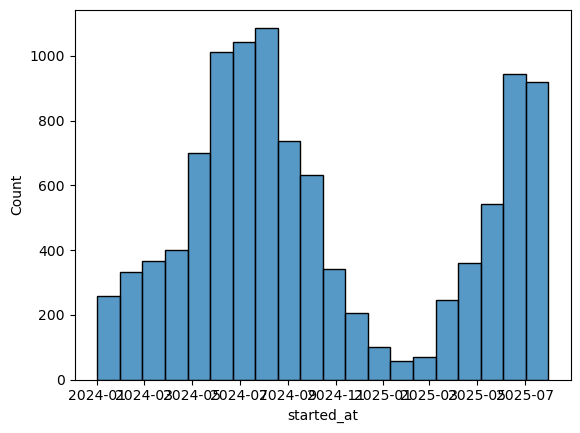

In [79]:
#the distribution of these classic bike rides with no recorded end coordinates matches that of all the data we have
sns.histplot(data = no_end_lat, x = no_end_lat['started_at'])
plt.show()

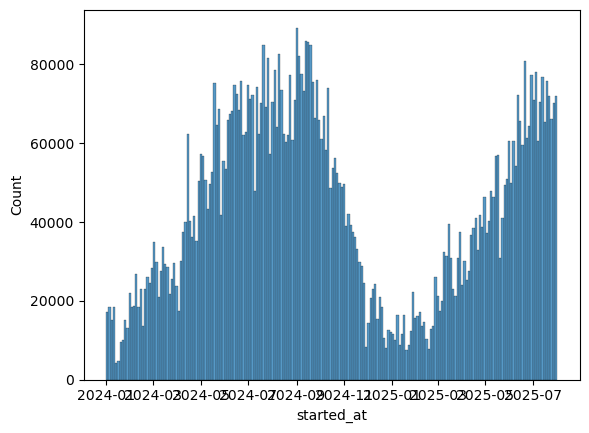

In [80]:
sns.histplot(data = final_merged_trips, x = final_merged_trips['started_at'])
plt.show()

We don't want to delete these rows because this would delete only classic bike rides from our data. Leave it for now.

# Final steps

Let's remove unnecessary columns and add some basic weather data

In [81]:
final_merged_trips.drop(columns = ['start_station_id', 'end_station_id'], inplace = True)

In [82]:
final_merged_trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,start_id,end_id
0,6A9D809ABDF70617,electric_bike,2024-01-01 00:00:39,2024-01-01 00:07:56,<NA>,Clark St & Wrightwood Ave,41.95,-87.65,41.9295,-87.6431,member,NaN,"['TA1305000014', 'CHI00287']"
1,26B9F6E416A68EBA,electric_bike,2024-01-01 00:00:50,2024-01-01 00:04:20,<NA>,<NA>,41.9,-87.62,41.9,-87.62,casual,NaN,NaN
2,30EF016A0DF5ECEE,electric_bike,2024-01-01 00:00:52,2024-01-01 00:04:25,<NA>,<NA>,41.9,-87.62,41.9,-87.62,casual,NaN,NaN
3,0D9E85F804C85828,electric_bike,2024-01-01 00:00:53,2024-01-01 00:22:30,Clinton St & Madison St,<NA>,41.8819,-87.6413,41.89,-87.62,member,"['TA1305000032', 'CHI00233']",NaN
4,56F5C3ED5178C131,classic_bike,2024-01-01 00:01:01,2024-01-01 00:24:12,LaSalle St & Illinois St,Indiana Ave & Roosevelt Rd,41.8908,-87.6317,41.8679,-87.623,member,"['13430', 'CHI00358']","['SL-005', 'CHI00450']"


In [83]:
weather = pd.read_csv('data/raw/weather/USC00111577.csv', skiprows = [0])

In [84]:
weather.head()

,Date,TAVG (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),SNWD (Inches)
0,1928-02-29,NaN,39.0,27.0,0.0,0.0,0.0
1,1928-03-01,NaN,36.0,20.0,0.0,0.0,0.0
2,1928-03-02,NaN,42.0,25.0,0.0,0.0,0.0
3,1928-03-03,NaN,37.0,15.0,0.0,0.0,0.0
4,1928-03-04,NaN,41.0,16.0,0.0,0.0,0.0


In [85]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35606 entries, 0 to 35605
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       35606 non-null  object 
 1   TAVG (Degrees Fahrenheit)  0 non-null      float64
 2   TMAX (Degrees Fahrenheit)  34184 non-null  float64
 3   TMIN (Degrees Fahrenheit)  34173 non-null  float64
 4   PRCP (Inches)              34180 non-null  float64
 5   SNOW (Inches)              34078 non-null  float64
 6   SNWD (Inches)              34071 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.9+ MB


In [86]:
weather.drop(columns = ['TAVG (Degrees Fahrenheit)'], inplace = True)
weather = weather.convert_dtypes()
weather['Date'] = pd.to_datetime(weather['Date'], format='ISO8601')
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35606 entries, 0 to 35605
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       35606 non-null  datetime64[ns]
 1   TMAX (Degrees Fahrenheit)  34184 non-null  Int64         
 2   TMIN (Degrees Fahrenheit)  34173 non-null  Int64         
 3   PRCP (Inches)              34180 non-null  Float64       
 4   SNOW (Inches)              34078 non-null  Float64       
 5   SNWD (Inches)              34071 non-null  Int64         
dtypes: Float64(2), Int64(3), datetime64[ns](1)
memory usage: 1.8 MB


In [87]:
weather = weather[weather['Date'] >= '2024-01-01']
weather.head()

,Date,TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),SNWD (Inches)
35005,2024-01-01,34,29,0.0,0.0,0
35006,2024-01-02,41,28,0.0,0.0,0
35007,2024-01-03,37,32,0.0,0.0,0
35008,2024-01-04,38,28,0.0,0.0,0
35009,2024-01-05,37,28,0.03,0.4,0


In [88]:
final_merged_trips['Date'] = final_merged_trips['started_at'].dt.floor('D')
final_merged_trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,start_id,end_id,Date
0,6A9D809ABDF70617,electric_bike,2024-01-01 00:00:39,2024-01-01 00:07:56,<NA>,Clark St & Wrightwood Ave,41.95,-87.65,41.9295,-87.6431,member,NaN,"['TA1305000014', 'CHI00287']",2024-01-01
1,26B9F6E416A68EBA,electric_bike,2024-01-01 00:00:50,2024-01-01 00:04:20,<NA>,<NA>,41.9,-87.62,41.9,-87.62,casual,NaN,NaN,2024-01-01
2,30EF016A0DF5ECEE,electric_bike,2024-01-01 00:00:52,2024-01-01 00:04:25,<NA>,<NA>,41.9,-87.62,41.9,-87.62,casual,NaN,NaN,2024-01-01
3,0D9E85F804C85828,electric_bike,2024-01-01 00:00:53,2024-01-01 00:22:30,Clinton St & Madison St,<NA>,41.8819,-87.6413,41.89,-87.62,member,"['TA1305000032', 'CHI00233']",NaN,2024-01-01
4,56F5C3ED5178C131,classic_bike,2024-01-01 00:01:01,2024-01-01 00:24:12,LaSalle St & Illinois St,Indiana Ave & Roosevelt Rd,41.8908,-87.6317,41.8679,-87.623,member,"['13430', 'CHI00358']","['SL-005', 'CHI00450']",2024-01-01


In [89]:
merged_final_df = pd.merge(final_merged_trips, weather, on='Date', how='left')

In [90]:
merged_final_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,start_id,end_id,Date,TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),SNWD (Inches)
0,6A9D809ABDF70617,electric_bike,2024-01-01 00:00:39,2024-01-01 00:07:56,<NA>,Clark St & Wrightwood Ave,41.95,-87.65,41.9295,-87.6431,member,NaN,"['TA1305000014', 'CHI00287']",2024-01-01,34,29,0.0,0.0,0
1,26B9F6E416A68EBA,electric_bike,2024-01-01 00:00:50,2024-01-01 00:04:20,<NA>,<NA>,41.9,-87.62,41.9,-87.62,casual,NaN,NaN,2024-01-01,34,29,0.0,0.0,0
2,30EF016A0DF5ECEE,electric_bike,2024-01-01 00:00:52,2024-01-01 00:04:25,<NA>,<NA>,41.9,-87.62,41.9,-87.62,casual,NaN,NaN,2024-01-01,34,29,0.0,0.0,0
3,0D9E85F804C85828,electric_bike,2024-01-01 00:00:53,2024-01-01 00:22:30,Clinton St & Madison St,<NA>,41.8819,-87.6413,41.89,-87.62,member,"['TA1305000032', 'CHI00233']",NaN,2024-01-01,34,29,0.0,0.0,0
4,56F5C3ED5178C131,classic_bike,2024-01-01 00:01:01,2024-01-01 00:24:12,LaSalle St & Illinois St,Indiana Ave & Roosevelt Rd,41.8908,-87.6317,41.8679,-87.623,member,"['13430', 'CHI00358']","['SL-005', 'CHI00450']",2024-01-01,34,29,0.0,0.0,0


In [91]:
merged_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8765156 entries, 0 to 8765155
Data columns (total 19 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   ride_id                    string        
 1   rideable_type              string        
 2   started_at                 datetime64[ns]
 3   ended_at                   datetime64[ns]
 4   start_station_name         object        
 5   end_station_name           object        
 6   start_lat                  Float64       
 7   start_lng                  Float64       
 8   end_lat                    Float64       
 9   end_lng                    Float64       
 10  member_casual              string        
 11  start_id                   object        
 12  end_id                     object        
 13  Date                       datetime64[ns]
 14  TMAX (Degrees Fahrenheit)  Int64         
 15  TMIN (Degrees Fahrenheit)  Int64         
 16  PRCP (Inches)              Float64  

Let's add a trip duration column too

In [92]:
merged_final_df['trip_duration'] = merged_final_df['ended_at'] - merged_final_df['started_at']
merged_final_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,start_id,end_id,Date,TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),SNWD (Inches),trip_duration
0,6A9D809ABDF70617,electric_bike,2024-01-01 00:00:39,2024-01-01 00:07:56,<NA>,Clark St & Wrightwood Ave,41.95,-87.65,41.9295,-87.6431,member,NaN,"['TA1305000014', 'CHI00287']",2024-01-01,34,29,0.0,0.0,0,0 days 00:07:17
1,26B9F6E416A68EBA,electric_bike,2024-01-01 00:00:50,2024-01-01 00:04:20,<NA>,<NA>,41.9,-87.62,41.9,-87.62,casual,NaN,NaN,2024-01-01,34,29,0.0,0.0,0,0 days 00:03:30
2,30EF016A0DF5ECEE,electric_bike,2024-01-01 00:00:52,2024-01-01 00:04:25,<NA>,<NA>,41.9,-87.62,41.9,-87.62,casual,NaN,NaN,2024-01-01,34,29,0.0,0.0,0,0 days 00:03:33
3,0D9E85F804C85828,electric_bike,2024-01-01 00:00:53,2024-01-01 00:22:30,Clinton St & Madison St,<NA>,41.8819,-87.6413,41.89,-87.62,member,"['TA1305000032', 'CHI00233']",NaN,2024-01-01,34,29,0.0,0.0,0,0 days 00:21:37
4,56F5C3ED5178C131,classic_bike,2024-01-01 00:01:01,2024-01-01 00:24:12,LaSalle St & Illinois St,Indiana Ave & Roosevelt Rd,41.8908,-87.6317,41.8679,-87.623,member,"['13430', 'CHI00358']","['SL-005', 'CHI00450']",2024-01-01,34,29,0.0,0.0,0,0 days 00:23:11


In [93]:
negative_duration = merged_final_df[merged_final_df['trip_duration'] < '0 days 00:00:00']
negative_duration.head()
negative_duration.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227 entries, 42525 to 5378140
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   ride_id                    227 non-null    string         
 1   rideable_type              227 non-null    string         
 2   started_at                 227 non-null    datetime64[ns] 
 3   ended_at                   227 non-null    datetime64[ns] 
 4   start_station_name         99 non-null     object         
 5   end_station_name           73 non-null     object         
 6   start_lat                  227 non-null    Float64        
 7   start_lng                  227 non-null    Float64        
 8   end_lat                    227 non-null    Float64        
 9   end_lng                    227 non-null    Float64        
 10  member_casual              227 non-null    string         
 11  start_id                   99 non-null     object      

There are 227 negative duration trips...

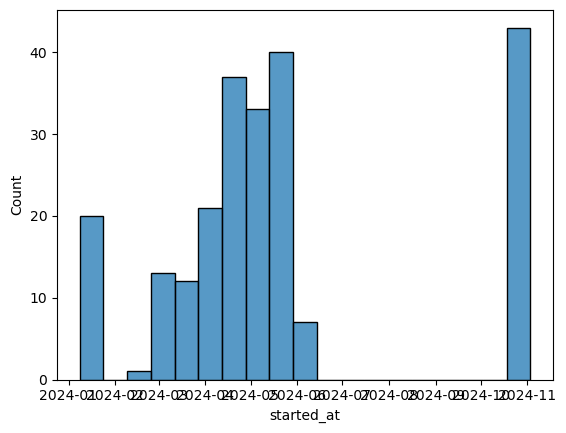

In [94]:
#the distribution of these classic bike rides with no recorded end coordinates matches that of all the data we have
sns.histplot(data = negative_duration, x = negative_duration['started_at'])
plt.show()

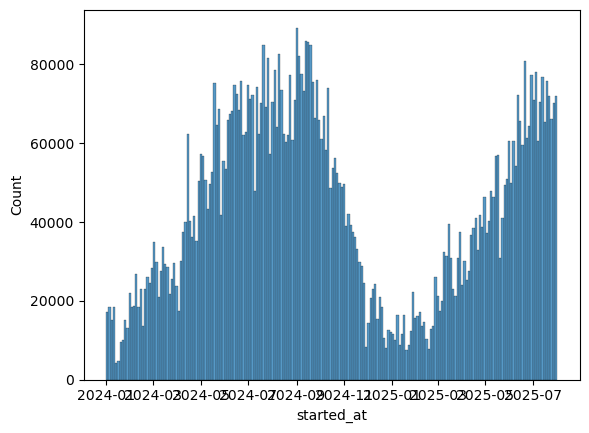

In [95]:
sns.histplot(data = final_merged_trips, x = final_merged_trips['started_at'])
plt.show()

In [96]:
zero_duration = merged_final_df[merged_final_df['trip_duration'] == '0 days 00:00:00']
zero_duration.head()
zero_duration.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496 entries, 4176 to 1694033
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   ride_id                    496 non-null    string         
 1   rideable_type              496 non-null    string         
 2   started_at                 496 non-null    datetime64[ns] 
 3   ended_at                   496 non-null    datetime64[ns] 
 4   start_station_name         242 non-null    object         
 5   end_station_name           192 non-null    object         
 6   start_lat                  496 non-null    Float64        
 7   start_lng                  496 non-null    Float64        
 8   end_lat                    496 non-null    Float64        
 9   end_lng                    496 non-null    Float64        
 10  member_casual              496 non-null    string         
 11  start_id                   242 non-null    object       

Given the tiny percentage of the data and the distribution of these weird values, just drop them.

In [97]:
merged_final_df = merged_final_df[merged_final_df['trip_duration'] > '0 days 00:00:00']

In [98]:
merged_final_df.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,Date,TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),SNWD (Inches),trip_duration
count,8764433,8764433,8764433.0,8764433.0,8754083.0,8754083.0,8764433,8744507.0,8764433.0,8459429.0,8764433.0,8703311.0,8764433
mean,2024-10-26 21:52:03.068677888,2024-10-26 22:08:59.691303680,41.902548,-87.646247,41.902965,-87.6465,2024-10-26 07:18:52.845216,73.434162,55.552801,0.096907,0.014699,0.02587,0 days 00:16:56.622625559
min,2024-01-01 00:00:39,2024-01-01 00:04:20,41.64,-87.91,16.06,-144.05,2024-01-01 00:00:00,2.0,-9.0,0.0,0.0,0.0,0 days 00:00:01
25%,2024-06-22 07:54:48,2024-06-22 08:16:47,41.881,-87.66,41.881,-87.66,2024-06-22 00:00:00,65.0,45.0,0.0,0.0,0.0,0 days 00:05:29
50%,2024-09-17 15:33:25,2024-09-17 15:48:16,41.8976,-87.6418,41.8984,-87.6426,2024-09-17 00:00:00,78.0,60.0,0.0,0.0,0.0,0 days 00:09:37
75%,2025-04-13 12:12:05,2025-04-13 12:28:33,41.93,-87.6295,41.93,-87.6296,2025-04-13 00:00:00,86.0,68.0,0.01,0.0,0.0,0 days 00:17:02
max,2025-07-31 23:56:06,2025-07-31 23:59:41,42.07,-87.52,87.96,152.53,2025-07-31 00:00:00,99.0,79.0,1.86,5.3,3.0,1 days 02:14:54
std,NaN,NaN,0.044665,0.027484,0.05251,0.094313,NaN,16.419094,15.225742,0.269218,0.175304,0.210358,0 days 00:59:59.860816325


In [99]:
merged_final_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,start_id,end_id,Date,TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),SNWD (Inches),trip_duration
0,6A9D809ABDF70617,electric_bike,2024-01-01 00:00:39,2024-01-01 00:07:56,<NA>,Clark St & Wrightwood Ave,41.95,-87.65,41.9295,-87.6431,member,NaN,"['TA1305000014', 'CHI00287']",2024-01-01,34,29,0.0,0.0,0,0 days 00:07:17
1,26B9F6E416A68EBA,electric_bike,2024-01-01 00:00:50,2024-01-01 00:04:20,<NA>,<NA>,41.9,-87.62,41.9,-87.62,casual,NaN,NaN,2024-01-01,34,29,0.0,0.0,0,0 days 00:03:30
2,30EF016A0DF5ECEE,electric_bike,2024-01-01 00:00:52,2024-01-01 00:04:25,<NA>,<NA>,41.9,-87.62,41.9,-87.62,casual,NaN,NaN,2024-01-01,34,29,0.0,0.0,0,0 days 00:03:33
3,0D9E85F804C85828,electric_bike,2024-01-01 00:00:53,2024-01-01 00:22:30,Clinton St & Madison St,<NA>,41.8819,-87.6413,41.89,-87.62,member,"['TA1305000032', 'CHI00233']",NaN,2024-01-01,34,29,0.0,0.0,0,0 days 00:21:37
4,56F5C3ED5178C131,classic_bike,2024-01-01 00:01:01,2024-01-01 00:24:12,LaSalle St & Illinois St,Indiana Ave & Roosevelt Rd,41.8908,-87.6317,41.8679,-87.623,member,"['13430', 'CHI00358']","['SL-005', 'CHI00450']",2024-01-01,34,29,0.0,0.0,0,0 days 00:23:11


In [100]:
member_rides = merged_final_df[merged_final_df['member_casual'] == 'member']
casual_rides = merged_final_df[merged_final_df['member_casual'] == 'casual']

member_rides.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,Date,TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),SNWD (Inches),trip_duration
count,5568153,5568153,5568153.0,5568153.0,5566380.0,5566380.0,5568153,5555019.0,5568153.0,5398963.0,5568153.0,5529705.0,5568153
mean,2024-10-23 19:32:58.388623616,2024-10-23 19:45:31.340110848,41.902316,-87.64731,41.902623,-87.647433,2024-10-23 05:10:46.556587520,71.552845,53.843159,0.097922,0.018932,0.033987,0 days 00:12:32.951488761
min,2024-01-01 00:00:39,2024-01-01 00:07:56,41.64,-87.91,21.79,-92.62,2024-01-01 00:00:00,2.0,-9.0,0.0,0.0,0.0,0 days 00:00:01
25%,2024-06-16 22:27:20,2024-06-16 22:41:51,41.881,-87.66,41.881,-87.6601,2024-06-16 00:00:00,60.0,43.0,0.0,0.0,0.0,0 days 00:05:03
50%,2024-09-20 22:39:57,2024-09-20 22:51:54,41.8977,-87.6441,41.8978,-87.6441,2024-09-20 00:00:00,76.0,57.0,0.0,0.0,0.0,0 days 00:08:37
75%,2025-04-03 12:44:55,2025-04-03 12:54:53,41.93,-87.63,41.93,-87.63,2025-04-03 00:00:00,85.0,67.0,0.01,0.0,0.0,0 days 00:14:38
max,2025-07-31 23:55:52,2025-07-31 23:59:41,42.07,-87.52,83.14,152.53,2025-07-31 00:00:00,99.0,79.0,1.86,5.3,3.0,1 days 01:59:48
std,NaN,NaN,0.044468,0.026491,0.050975,0.111974,NaN,17.331825,15.931803,0.26607,0.198469,0.240349,0 days 00:33:44.744345961


In [101]:
casual_rides.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,Date,TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),SNWD (Inches),trip_duration
count,3196280,3196280,3196280.0,3196280.0,3187703.0,3187703.0,3196280,3189488.0,3196280.0,3060466.0,3196280.0,3173606.0,3196280
mean,2024-11-01 07:20:05.424692480,2024-11-01 07:44:41.381679872,41.902952,-87.644395,41.903562,-87.644871,2024-10-31 16:27:48.235322624,76.710785,58.531122,0.095117,0.007325,0.011728,0 days 00:24:35.956986559
min,2024-01-01 00:00:50,2024-01-01 00:04:20,41.64,-87.9,16.06,-144.05,2024-01-01 00:00:00,2.0,-9.0,0.0,0.0,0.0,0 days 00:00:01
25%,2024-06-29 16:57:16.500000,2024-06-29 17:23:46.750000128,41.881,-87.6589,41.881,-87.6597,2024-06-29 00:00:00,70.0,50.0,0.0,0.0,0.0,0 days 00:06:36
50%,2024-09-12 17:55:47.500000,2024-09-12 18:10:53,41.8974,-87.6396,41.899,-87.64,2024-09-12 00:00:00,80.0,61.0,0.0,0.0,0.0,0 days 00:11:56
75%,2025-04-30 17:47:59.249999872,2025-04-30 18:03:10,41.9295,-87.6251,41.93,-87.6257,2025-04-30 00:00:00,87.0,69.0,0.0,0.0,0.0,0 days 00:22:24
max,2025-07-31 23:56:06,2025-07-31 23:59:37,42.07,-87.52,87.96,-79.02,2025-07-31 00:00:00,99.0,79.0,1.86,5.3,3.0,1 days 02:14:54
std,NaN,NaN,0.045005,0.02904,0.055083,0.05029,NaN,14.107914,13.399139,0.274673,0.124749,0.142769,0 days 01:28:17.229300775


In [102]:
high_outliers = merged_final_df[merged_final_df['trip_duration'] >= '1 days 00:00:00']
high_outliers.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,Date,TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),SNWD (Inches),trip_duration
count,10757,10757,10757.0,10757.0,493.0,493.0,10757,10735.0,10757.0,10363.0,10757.0,10715.0,10757
mean,2024-10-09 01:03:46.328344320,2024-10-10 02:03:07.065817600,41.889189,-87.642057,41.89654,-87.645254,2024-10-08 10:32:23.069629184,74.760596,56.825602,0.092609,0.013954,0.032758,1 days 00:59:20.737473273
min,2024-01-01 00:28:08,2024-01-02 01:28:01,41.6485,-87.8367,41.6918,-87.77,2024-01-01 00:00:00,2.0,-9.0,0.0,0.0,0.0,1 days 00:00:38
25%,2024-06-07 22:33:41,2024-06-08 23:33:19,41.8727,-87.6546,41.8715,-87.6601,2024-06-07 00:00:00,68.0,48.0,0.0,0.0,0.0,1 days 00:59:40
50%,2024-08-15 20:27:20,2024-08-16 21:26:58,41.8892,-87.6344,41.8923,-87.64,2024-08-15 00:00:00,80.0,61.0,0.0,0.0,0.0,1 days 00:59:51
75%,2025-04-17 16:25:15,2025-04-18 17:25:12,41.9157,-87.6238,41.93,-87.6258,2025-04-17 00:00:00,86.0,69.0,0.0,0.0,0.0,1 days 00:59:54
max,2025-07-30 22:25:26,2025-07-31 23:25:18,42.0649,-87.5282,42.06,-87.5304,2025-07-30 00:00:00,99.0,79.0,1.86,5.3,3.0,1 days 02:14:54
std,NaN,NaN,0.054359,0.033167,0.058245,0.03086,NaN,16.765252,15.578103,0.270609,0.173241,0.229742,0 days 00:05:44.710057939


In [103]:
low_outliers = merged_final_df[merged_final_df['trip_duration'] <= '0 days 00:00:03']
low_outliers.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,Date,TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),SNWD (Inches),trip_duration
count,20021,20021,20021.0,20021.0,20021.0,20021.0,20021,19980.0,20021.0,19122.0,20021.0,19887.0,20021
mean,2024-11-11 09:55:44.819789312,2024-11-11 09:55:46.732480768,41.907484,-87.652508,41.907468,-87.652478,2024-11-10 18:57:33.453873664,74.472923,56.305629,0.105356,0.018171,0.038819,0 days 00:00:01.912691673
min,2024-01-01 00:39:43,2024-01-01 00:39:45,41.6536,-87.85,41.6536,-87.85,2024-01-01 00:00:00,2.0,-9.0,0.0,0.0,0.0,0 days 00:00:01
25%,2024-06-17 19:24:36,2024-06-17 19:24:39,41.8824,-87.67,41.881,-87.67,2024-06-17 00:00:00,67.0,47.0,0.0,0.0,0.0,0 days 00:00:01
50%,2024-09-26 20:02:58,2024-09-26 20:03:00,41.91,-87.65,41.91,-87.65,2024-09-26 00:00:00,78.0,60.0,0.0,0.0,0.0,0 days 00:00:02
75%,2025-05-14 20:52:40,2025-05-14 20:52:42,41.94,-87.63,41.94,-87.63,2025-05-14 00:00:00,86.0,69.0,0.02,0.0,0.0,0 days 00:00:02
max,2025-07-31 23:31:03,2025-07-31 23:31:05,42.07,-87.5304,42.07,-87.5304,2025-07-31 00:00:00,99.0,79.0,1.86,5.3,3.0,0 days 00:00:03
std,NaN,NaN,0.049406,0.032331,0.049415,0.032389,NaN,16.314644,15.366292,0.283667,0.190673,0.268725,0 days 00:00:00.710116178


There are a lot of outiers on both ends that could be errors, but we'll leave them for now since it'll be easier to choose a cutoff for deleting them when we do more graphical analysis.

In [104]:
merged_final_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,start_id,end_id,Date,TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),SNWD (Inches),trip_duration
0,6A9D809ABDF70617,electric_bike,2024-01-01 00:00:39,2024-01-01 00:07:56,<NA>,Clark St & Wrightwood Ave,41.95,-87.65,41.9295,-87.6431,member,NaN,"['TA1305000014', 'CHI00287']",2024-01-01,34,29,0.0,0.0,0,0 days 00:07:17
1,26B9F6E416A68EBA,electric_bike,2024-01-01 00:00:50,2024-01-01 00:04:20,<NA>,<NA>,41.9,-87.62,41.9,-87.62,casual,NaN,NaN,2024-01-01,34,29,0.0,0.0,0,0 days 00:03:30
2,30EF016A0DF5ECEE,electric_bike,2024-01-01 00:00:52,2024-01-01 00:04:25,<NA>,<NA>,41.9,-87.62,41.9,-87.62,casual,NaN,NaN,2024-01-01,34,29,0.0,0.0,0,0 days 00:03:33
3,0D9E85F804C85828,electric_bike,2024-01-01 00:00:53,2024-01-01 00:22:30,Clinton St & Madison St,<NA>,41.8819,-87.6413,41.89,-87.62,member,"['TA1305000032', 'CHI00233']",NaN,2024-01-01,34,29,0.0,0.0,0,0 days 00:21:37
4,56F5C3ED5178C131,classic_bike,2024-01-01 00:01:01,2024-01-01 00:24:12,LaSalle St & Illinois St,Indiana Ave & Roosevelt Rd,41.8908,-87.6317,41.8679,-87.623,member,"['13430', 'CHI00358']","['SL-005', 'CHI00450']",2024-01-01,34,29,0.0,0.0,0,0 days 00:23:11


In [105]:
merged_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8764433 entries, 0 to 8765155
Data columns (total 20 columns):
 #   Column                     Dtype          
---  ------                     -----          
 0   ride_id                    string         
 1   rideable_type              string         
 2   started_at                 datetime64[ns] 
 3   ended_at                   datetime64[ns] 
 4   start_station_name         object         
 5   end_station_name           object         
 6   start_lat                  Float64        
 7   start_lng                  Float64        
 8   end_lat                    Float64        
 9   end_lng                    Float64        
 10  member_casual              string         
 11  start_id                   object         
 12  end_id                     object         
 13  Date                       datetime64[ns] 
 14  TMAX (Degrees Fahrenheit)  Int64          
 15  TMIN (Degrees Fahrenheit)  Int64          
 16  PRCP (Inches)          

In [108]:
null_counts = merged_final_df.isnull().sum()
null_counts

ride_id                            0
rideable_type                      0
started_at                         0
ended_at                           0
start_station_name           1676646
end_station_name             1732765
start_lat                          0
start_lng                          0
end_lat                        10350
end_lng                        10350
member_casual                      0
start_id                     1676646
end_id                       1732767
Date                               0
TMAX (Degrees Fahrenheit)      19926
TMIN (Degrees Fahrenheit)          0
PRCP (Inches)                 305004
SNOW (Inches)                      0
SNWD (Inches)                  61122
trip_duration                      0
dtype: int64

Looks like a useful dataframe to start with! Saving so it's ready to go:

In [109]:
merged_final_df.to_csv('data/processed/divvy_data_cleaned.csv', index=False)